# LOG PREDICTION COMPARISON
In my experience, Shear wave is not always present in logging data. Here I proposed and compared three methods in predicting shear wave data based on the other logging data. It may not has any geological correlation so this is mostly numeric.

Methods:
1. Machine Learning - Linear Regression
2. Neural Network - Keras Regression

In [1]:
##Import Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
#Data Import
well=pd.read_csv('/content/sample_data/dumdum.csv')

In [6]:
well.describe().transpose()
#Data contain null value = -999.000

,count,mean,std,min,25%,50%,75%,max
DEPTH,6482.0,487.329909,313.864923,-999.0000,259.118100,506.04420,752.970300,999.8964
BS,6482.0,-413.881295,514.599304,-999.0000,-999.000000,8.50000,8.500000,124.1735
GR,6482.0,88.834768,47.330034,-999.0000,78.445200,93.84045,106.828100,127.5483
DTCO,6482.0,-374.897269,549.523530,-999.0000,-999.000000,82.47430,105.625700,291.5052
DTSM,6482.0,-356.497389,568.390726,-999.0000,-999.000000,8.68225,168.686700,394.1993
MSFL,6482.0,30.484838,165.676830,-999.0000,3.992450,5.49140,9.814825,2000.0000
LLD,6482.0,15.592940,54.825392,-999.0000,3.272325,4.82350,10.119250,1286.7229
LLS,6482.0,11.063769,62.212479,-999.0000,2.550325,3.43030,5.317000,1598.2513
RHOB,6482.0,31.123804,61.884327,-999.0000,2.451725,2.50320,2.563475,176.0000
SP,6482.0,112.640591,64.651888,-999.0000,129.312500,135.46875,142.125000,241.3750


In [7]:
well.columns

Index(['DEPTH', 'BS', 'GR', 'DTCO', 'DTSM', 'MSFL', 'LLD', 'LLS', 'RHOB', 'SP',
       'NPHI', 'DRHO'],
      dtype='object')

In [0]:
#NULL DATA will not be included in the calculation hence I make new data set called new_well
new_well=well[(well['DEPTH']>192.00)&(well['RHOB']>-999.00)&(well['GR']>-999.00)&(well['DTCO']>-999.00)&(well['DTSM']>-999.00)&(well['MSFL']>-999.00)&(well['LLD']>-999.00)]
new_well=new_well.drop('BS',axis=1)
new_well['RHOB']=new_well['RHOB']+new_well['DRHO']
new_well=new_well.drop('DRHO',axis=1)

In [10]:
new_well.describe().transpose()
#no more null data

,count,mean,std,min,25%,50%,75%,max
DEPTH,2460.0,812.520600,108.247457,625.1448,718.832700,812.52060,906.208500,999.8964
GR,2460.0,85.959793,24.906858,17.8855,67.666125,90.96020,107.629575,127.4864
DTCO,2460.0,93.445770,17.597132,46.7328,87.454150,96.76685,103.156275,158.8792
DTSM,2460.0,194.383423,51.784975,84.2482,159.050150,198.97665,230.285125,394.1993
MSFL,2460.0,51.048194,213.213725,0.2598,4.213650,5.75495,8.912325,1799.6796
LLD,2460.0,24.625616,72.625734,1.3919,3.485250,5.41095,11.243775,1286.7229
LLS,2460.0,25.787934,85.550585,1.2123,3.452550,5.32275,10.594550,1598.2513
RHOB,2460.0,2.469187,0.232348,1.2135,2.420675,2.50345,2.545125,2.9972
SP,2460.0,145.689482,8.460944,132.4375,139.312500,144.06250,149.500000,183.2500
NPHI,2460.0,0.295348,0.089079,0.0843,0.237600,0.29945,0.348250,0.6606


# Exploratory Data Analysis

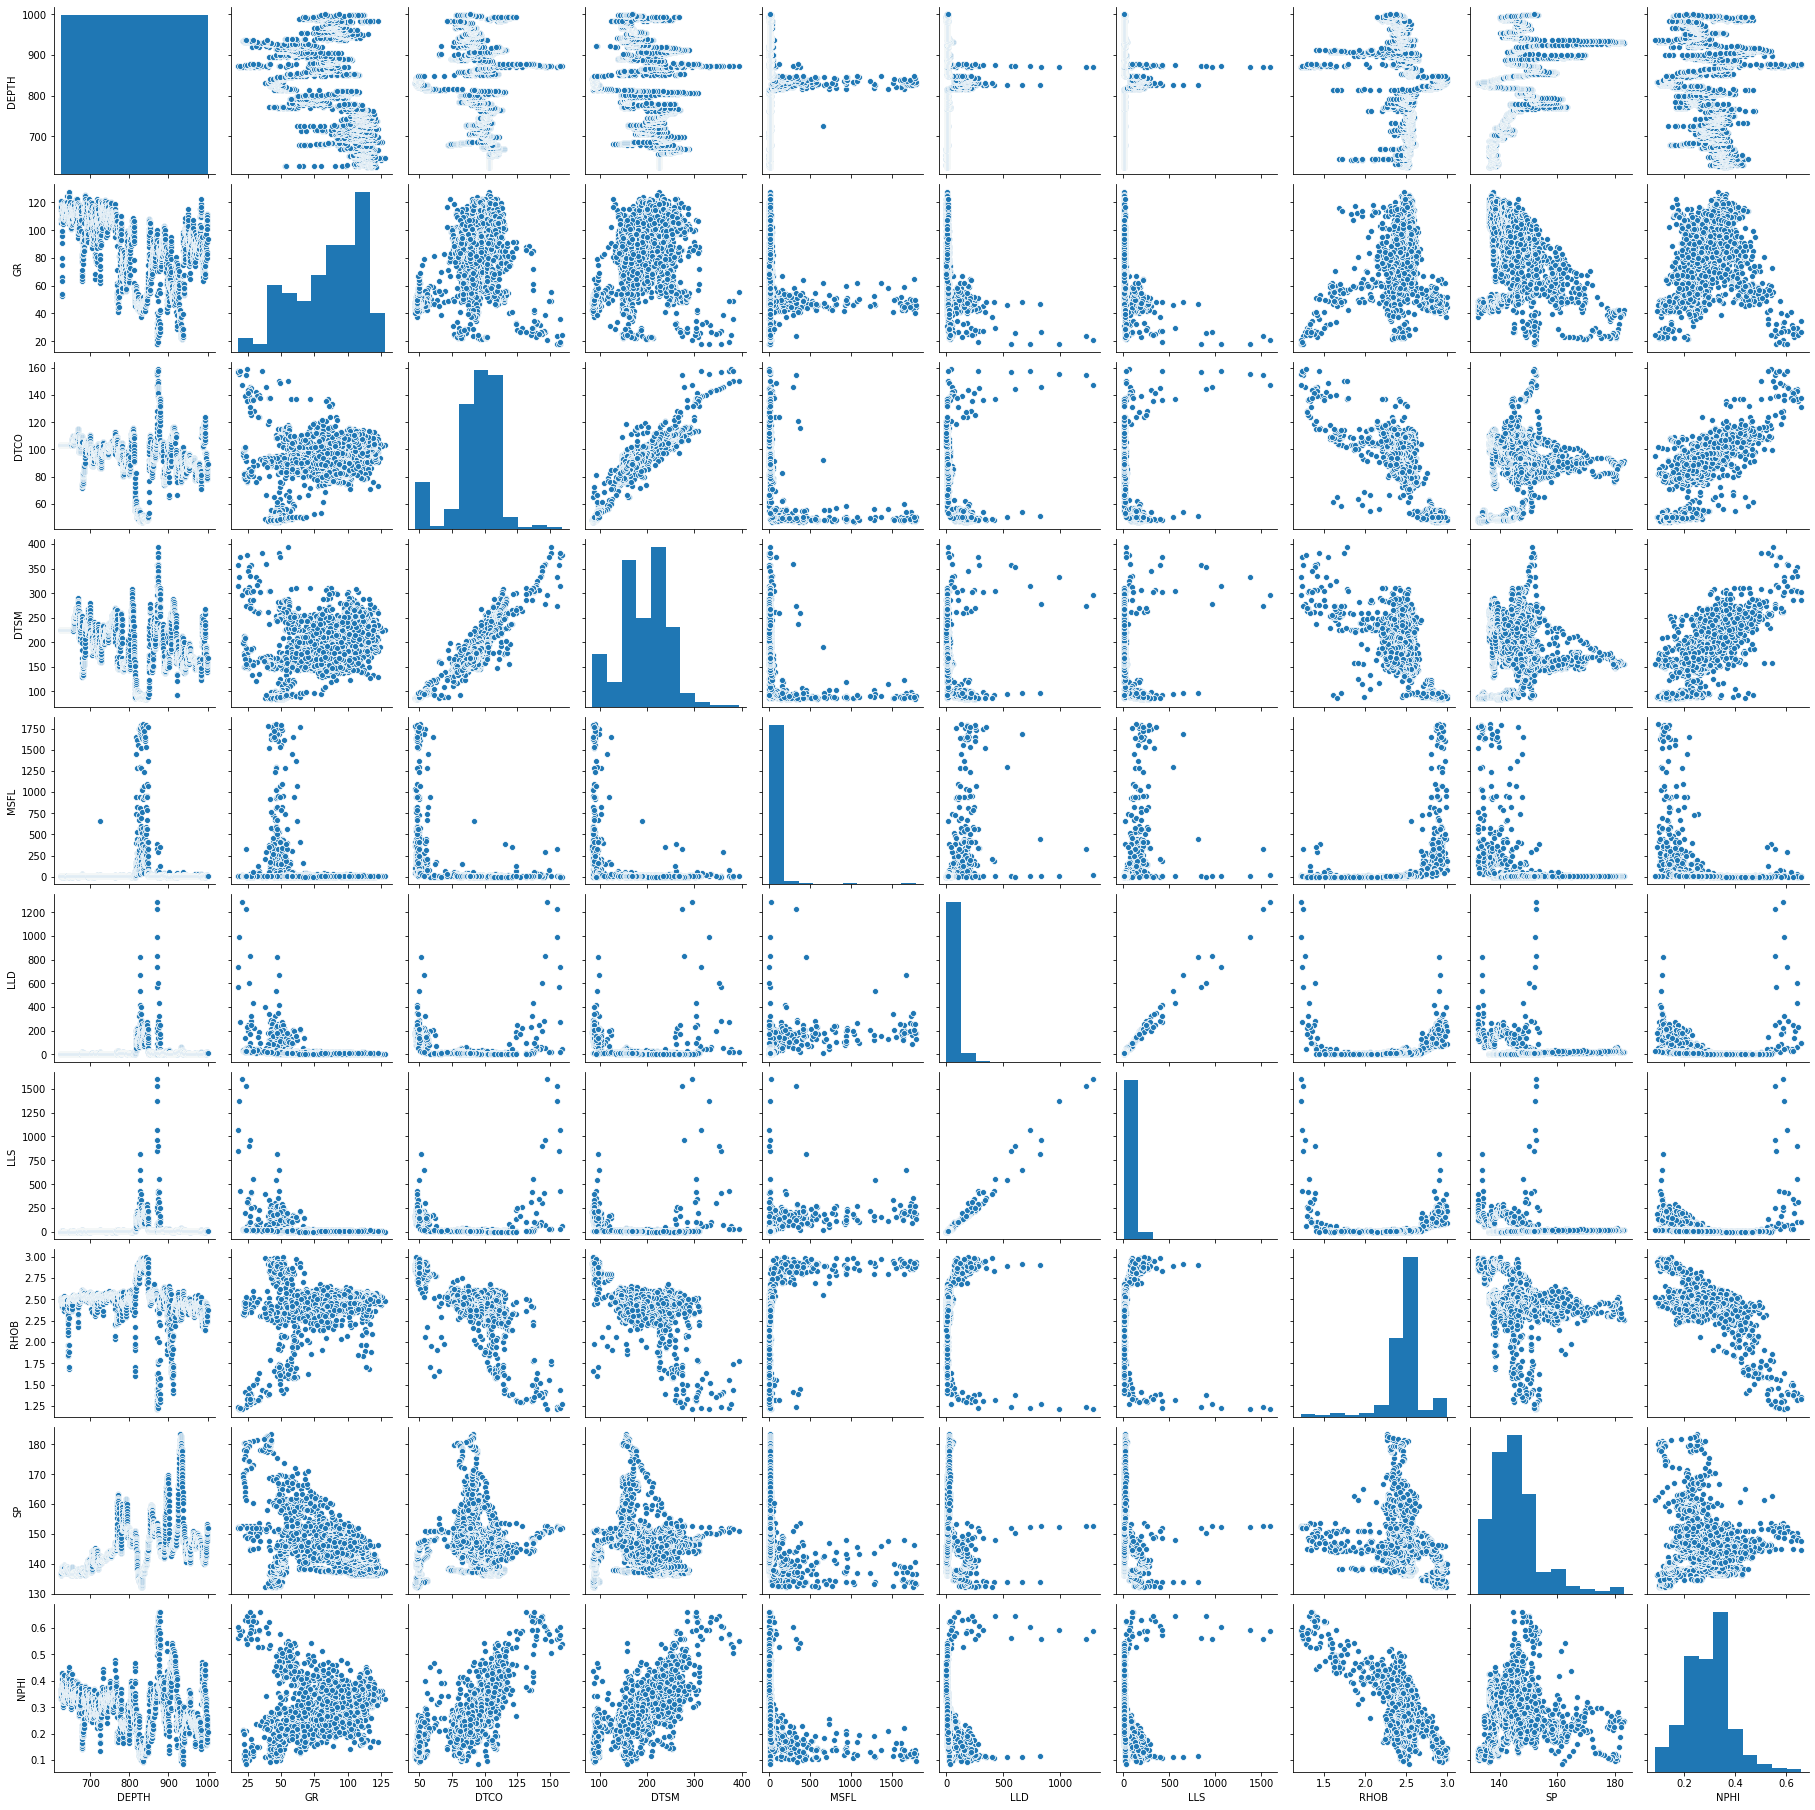

In [11]:
#See the general data distribution between each attributes
sns.pairplot(new_well)

(10.0, 0.0)

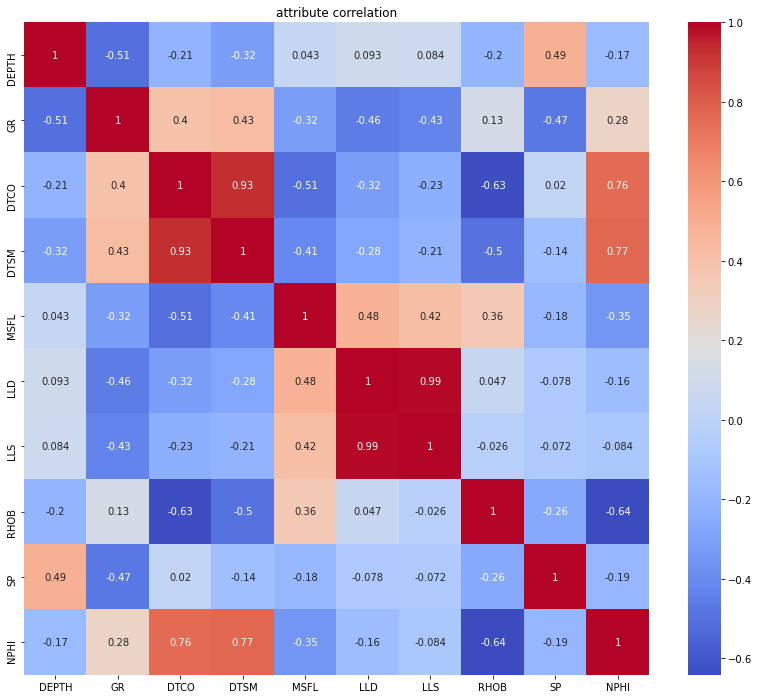

In [12]:
#See the correlation between each attribute
plt.figure(figsize=(14,12))
sns.heatmap(new_well.corr(),cmap='coolwarm',annot=True)
plt.title('attribute correlation')
plt.ylim(10,0)

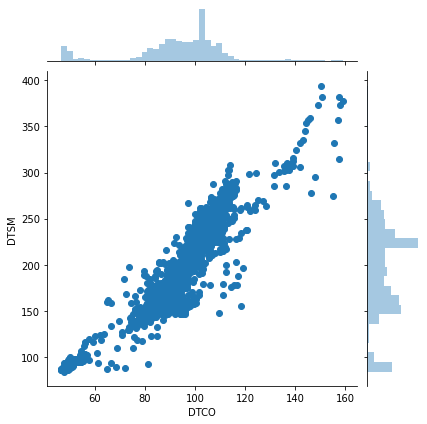

In [13]:
#In theory Vp and Vs will have high correlation since it measure common elastic moduli
sns.jointplot(x='DTCO',y='DTSM',data=new_well)

# Machine Learning - Linear Regression

In [0]:
##IMPORT MACHINE LEARNING LIBRARY
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
#X for all logging data except depth
#Y arrays for S-Wave
X =new_well[['GR', 'DTCO','MSFL','LLD','LLS','RHOB','SP','NPHI']]
y=new_well['DTSM']

#TRAIN TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [16]:
#CREATING AND TRAINING THE MODEL
dts=LinearRegression()
dts.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

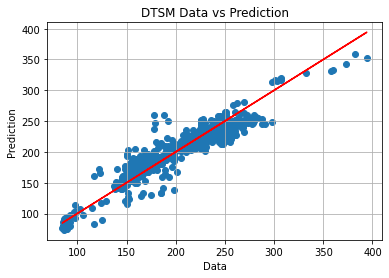

In [17]:
#PREDICTIONS
dtsm_pred=dts.predict(X_test)
#KEEPING THE RESULT FOR COMPARISON
dtsm1=pd.DataFrame(dtsm_pred)

#SCATTER PLOT DATA vs PREDICTION AND RESIDUAL HISTOGRAM
plt.scatter(y_test,dtsm_pred)
plt.title('DTSM Data vs Prediction')
plt.xlabel('Data')
plt.ylabel('Prediction')
plt.grid()
plt.plot(y_test,y_test,'r')

In [18]:
#REGRESSION EVALUATION METRICS
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, dtsm_pred))
print('MSE:', metrics.mean_squared_error(y_test, dtsm_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,dtsm_pred)))

MAE: 11.425408842046155
MSE: 254.66372030744935
RMSE: 15.95818662340585


# NEURAL NETWORK - KERAS REGRESSION

In [0]:
#import tensorflow library
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [0]:
#SCALING
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [0]:
#CREATING A MODEL
model=Sequential()

model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(8,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [23]:
#TRAINING THE MODEL
model.fit(x=X_train,y=y_train.values,validation_data=(X_test,y_test.values),batchsize=128,epochs=400)

Epoch 1/400
54/54 [==============================] - 0s 4ms/step - loss: 40203.3203 - val_loss: 40042.0703
Epoch 2/400
54/54 [==============================] - 0s 2ms/step - loss: 39659.4180 - val_loss: 38890.9141
Epoch 3/400
54/54 [==============================] - 0s 2ms/step - loss: 37232.7148 - val_loss: 34639.0625
Epoch 4/400
54/54 [==============================] - 0s 2ms/step - loss: 30213.8379 - val_loss: 24361.7090
Epoch 5/400
54/54 [==============================] - 0s 2ms/step - loss: 16868.9961 - val_loss: 9101.4326
Epoch 6/400
54/54 [==============================] - 0s 2ms/step - loss: 4491.0806 - val_loss: 1848.3007
Epoch 7/400
54/54 [==============================] - 0s 2ms/step - loss: 1587.9999 - val_loss: 1501.4321
Epoch 8/400
54/54 [==============================] - 0s 2ms/step - loss: 1454.1376 - val_loss: 1415.5985
Epoch 9/400
54/54 [==============================] - 0s 2ms/step - loss: 1370.5383 - val_loss: 1329.6117
Epoch 10/400
54/54 [==========================

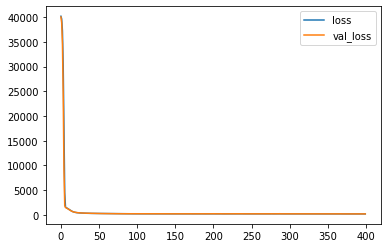

In [24]:
losses=pd.DataFrame(model.history.history)
losses.plot()

In [25]:
#RESULT
nn_predictions=model.predict(X_test)

#EVALUATIONS
print('Neural Network Evaluation')
print('MAE:', metrics.mean_absolute_error(y_test, nn_predictions))
print('MSE:', metrics.mean_squared_error(y_test, nn_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,nn_predictions)))

Neural Network Evaluation
MAE: 9.694589927330119
MSE: 203.6790904475572
RMSE: 14.271618354186648


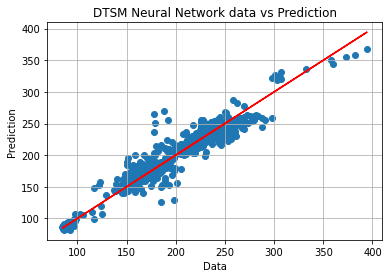

In [27]:
#PLOT PREDICTION RESULT
plt.scatter(y_test,nn_predictions)

#RIGHT RESULT
plt.plot(y_test,y_test,'r')
plt.title('DTSM Neural Network data vs Prediction')
plt.xlabel('Data')
plt.ylabel('Prediction')
plt.grid()